In [170]:
import pandas as pd 

covid  = pd.read_csv('../datas/covid_clean.csv') 

covid.head()

,USMER,MEDICAL_UNIT,SEX,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,2020-09-06,1,2,55,3,1,2,2,2,2,2,2,2,2,2,3,2
1,1,2,1,2020-05-04,1,1,14,3,2,2,2,2,2,2,2,2,2,2,7,2
2,1,2,2,2020-08-05,1,2,0,2,2,2,2,2,2,2,2,2,2,2,7,2
3,1,3,2,2020-07-03,1,2,64,2,2,2,2,2,2,1,2,2,1,2,7,1
4,1,3,2,2020-05-04,1,2,53,2,2,2,2,2,2,2,2,2,2,2,3,2


In [171]:
# Mettre DATE_DIED en index
covid = covid.set_index('DATE_DIED').sort_index(ascending=True)

on met la colonne  DATE_DIED en index du DataFrame afin de pouvoir effectuer des  analyses par date de décès

<Axes: title={'center': 'Âge moyen des décès par mois'}, xlabel='DATE_DIED'>

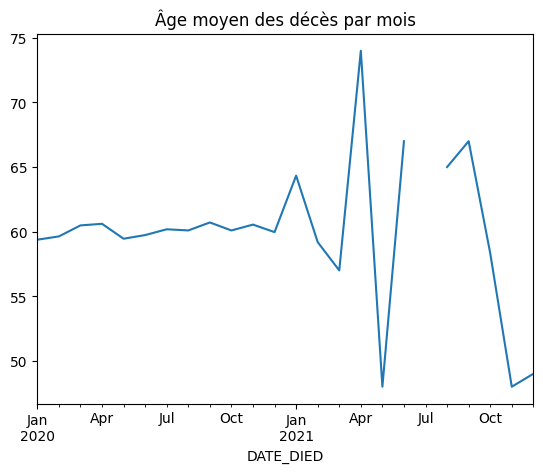

In [ ]:
# Grouper par mois selon la colonne DATE_DIED et calculer la moyenne d'AGE
moyenne_age_par_mois = covid['AGE'].resample('ME').mean()


moyenne_age_par_mois.plot(title="Âge moyen des décès par mois")

On observe qu’entre janvier 2020 et février 2021, l’âge moyen des décès dus au COVID est d’environ 60 ans. Cependant, durant les trois mois suivants, soit environ un an après le début de la pandémie, l’âge moyen des décès concerne tous les groupes d’âge.

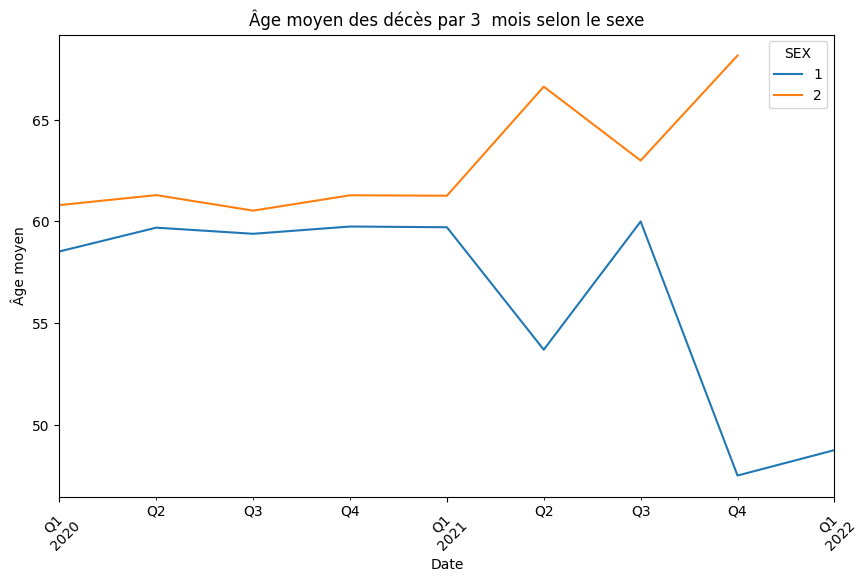

In [ ]:
import matplotlib.pyplot as plt 

moyenne_age_par_mois_sex = covid.groupby('SEX')['AGE'].resample('3ME').mean().unstack(level=0)

moyenne_age_par_mois_sex.plot(figsize=(10,6))
plt.title("Âge moyen des décès par 3  mois selon le sexe")
plt.xlabel("Date")
plt.ylabel("Âge moyen")
plt.xticks(rotation=45)
plt.show()


D’après ce graphique, entre janvier 2020 et janvier 2021, la moyenne d’âge des patients par genre est proche de 60 ans. La moyenne d’âge des femmes est supérieure à celle des hommes. Trois mois après le début de 2021, la moyenne d’âge des femmes diminue, tandis que celle des hommes augmente.

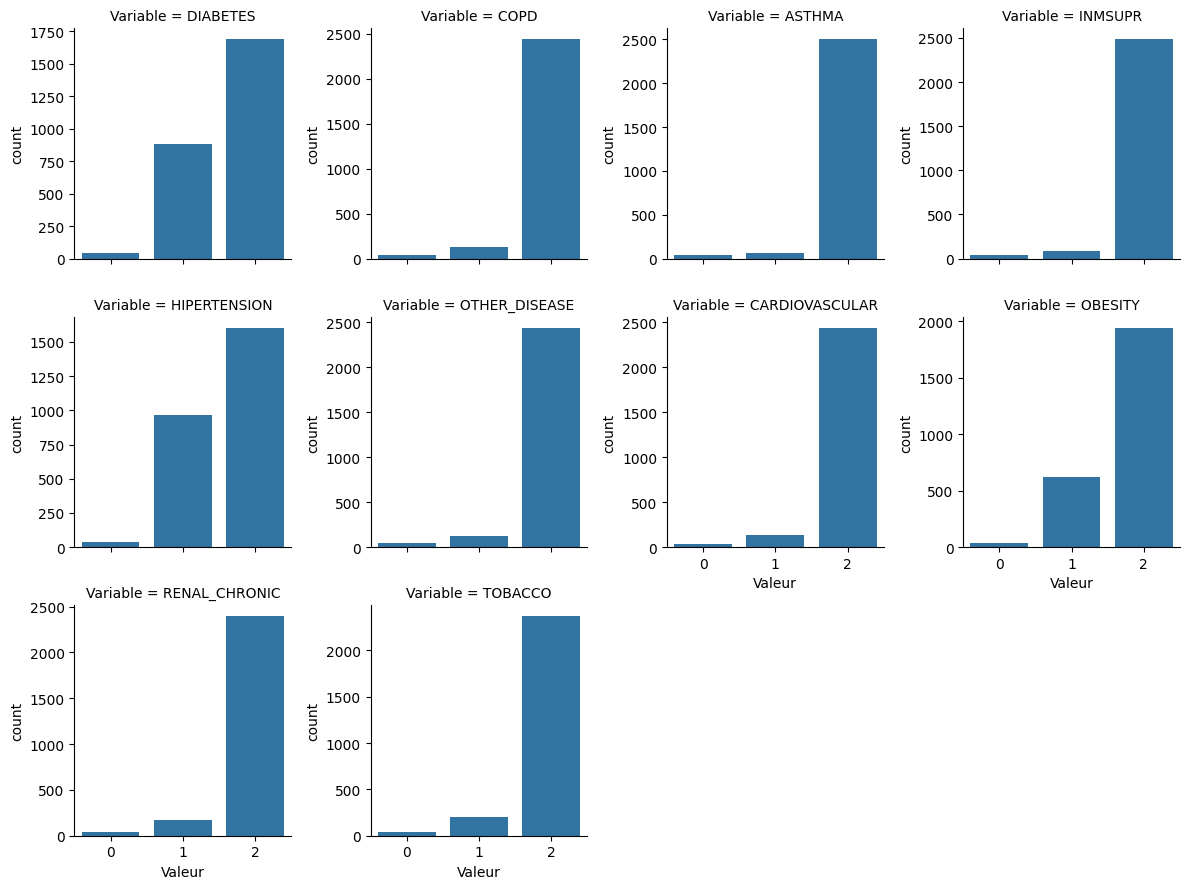

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

variables_maladies = [
    'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
    'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR',
    'OBESITY', 'RENAL_CHRONIC', 'TOBACCO'
]


covid_melted = covid[variables_maladies].melt(var_name='Variable', value_name='Valeur')

g = sns.FacetGrid(covid_melted, col="Variable", col_wrap=4, height=3, sharex=True, sharey=False)
g.map(sns.countplot,"Valeur", order=[0,1,2])
plt.show()

1 : patient malade

2 : patient sain

0 : inconnu

D'apres ces  graphique,  on constate que  le diabet et l'hypertansion sont les maladies qui affectent plus des patients. 
En revanche , des maladies commne ASTHMA et UNMSURP  les affectent moin par apport tous les maladies existants chez les patients étudiés ,  donc consontrans nos ananlyse sur cette deux maladies qui peux être la cause de la mort de la plus part  des patients.

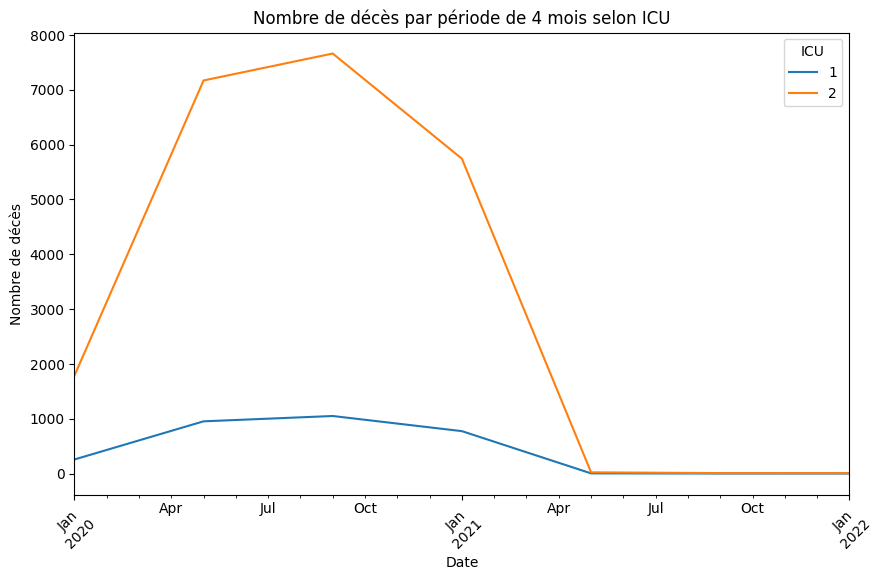

In [ ]:
import matplotlib.pyplot as plt


patient_icu_4m = covid.groupby('ICU').resample('4ME').size().unstack('ICU').fillna(0)

fig, ax = plt.subplots(figsize=(10,6))
patient_icu_4m.plot(kind='line', ax=ax)
ax.set_title("Nombre de décès par période de 4 mois selon ICU")
ax.set_ylabel("Nombre de décès")
ax.set_xlabel("Date")

plt.xticks(rotation=45)
plt.show()


ICU     : Unité de Soint Instensif. 1 = (en ICU) 2 (pas en ICU)

La majorité des patients n'ont pas été admis en soins intensifs, représentés par le chiffre 2 (en orange).
Le groupe 1 (en bleu), qui correspond aux patients effectivement admis en ICU, reste minoritaire et ne dépasse pas les 100 patients par mois. Cela suggère que malgré la gravité de certains cas, la charge en soins intensifs reste limitée par rapport au nombre total de patients.

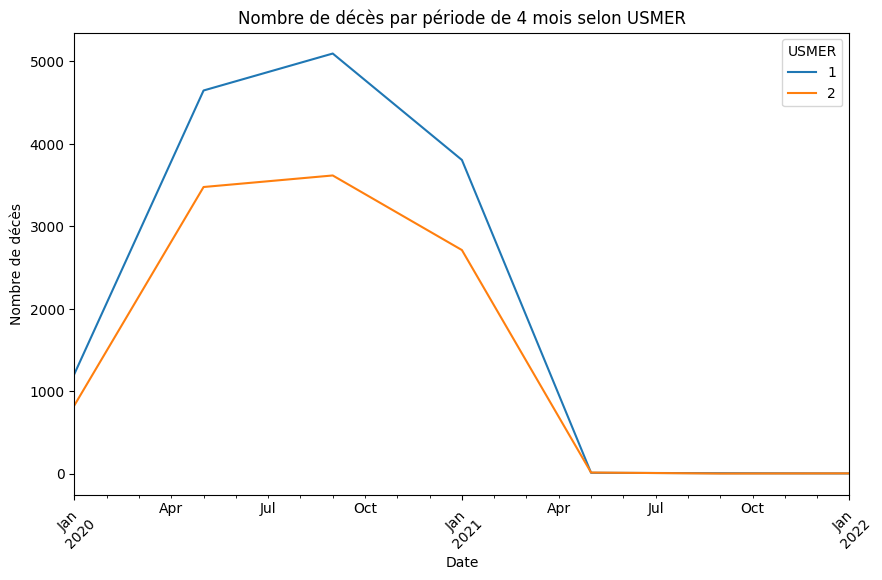

In [ ]:
import matplotlib.pyplot as plt


patient_usmer_4m = covid.groupby('USMER').resample('4ME').size().unstack('USMER').fillna(0)

fig, ax = plt.subplots(figsize=(10,6))
patient_usmer_4m.plot(kind='line', ax=ax)
ax.set_title("Nombre de décès par période de 4 mois selon USMER")
ax.set_ylabel("Nombre de décès")
ax.set_xlabel("Date")

plt.xticks(rotation=45)
plt.show()


USMER   :  Unité de Santé de Surveillance des Maladies Respiratoires. 1 = (Cas détecté dans une unité USEMER) 2 = (Cas      détecté hors des unités USEMER)

La majorité des patients sont bien suivis dans les unités USMER (USMER = 1), ce qui montre une bonne couverture des cas par les centres officiels de surveillance.
Cependant, une part non négligeable des cas (USMER = 2) est détectée hors de ces unités, ce qui peut refléter des cas rapportés par d'autres structures ou des cas moins bien suivis.

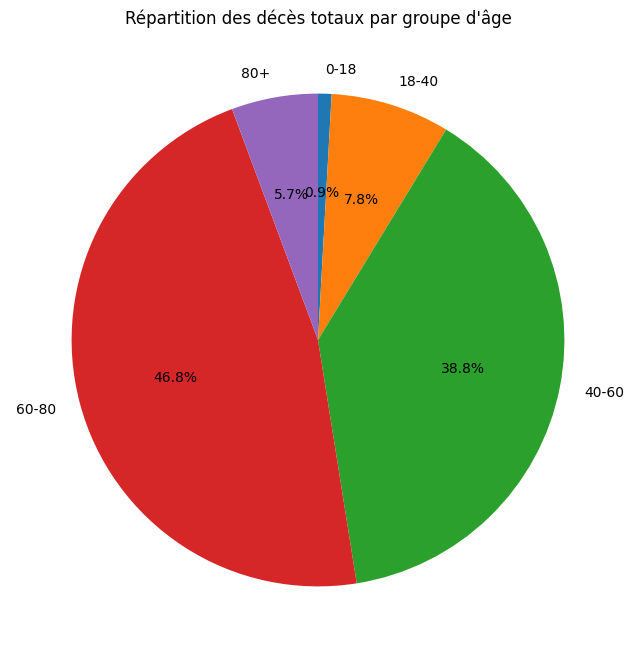

In [ ]:
import matplotlib.pyplot as plt

# Créer des tranches d'âge 
bins = [0, 18, 40, 60, 80, 90] 
labels = ['0-18', '18-40', '40-60', '60-80', '80+']

covid_AGE_GROUP = pd.cut(covid['AGE'], bins=bins, labels=labels, right=True)

total_deces_par_agegroup = covid_AGE_GROUP.value_counts().sort_index()


plt.figure(figsize=(8,8))
total_deces_par_agegroup.plot.pie(
    labels=total_deces_par_agegroup.index, 
    autopct='%1.1f%%',                     
    startangle=90,
    counterclock=False
)
plt.title("Répartition des décès totaux par groupe d'âge")
plt.ylabel('')  
plt.show()



D’après ce graphique, 46,8 % des patients décédés ont entre 60 et 80 ans, ce qui montre que le COVID-19 a particulièrement affecté les personnes plus âgées. Ensuite, 38,9 % des décès concernent les personnes âgées de 40 à 60 ans, et 8 % ont entre 18 et 40 ans. En revanche, seulement 0,9 % des décès concernent les patients de moins de 18 ans, ce qui indique que le COVID-19 a eu un impact beaucoup plus faible sur les jeunes.

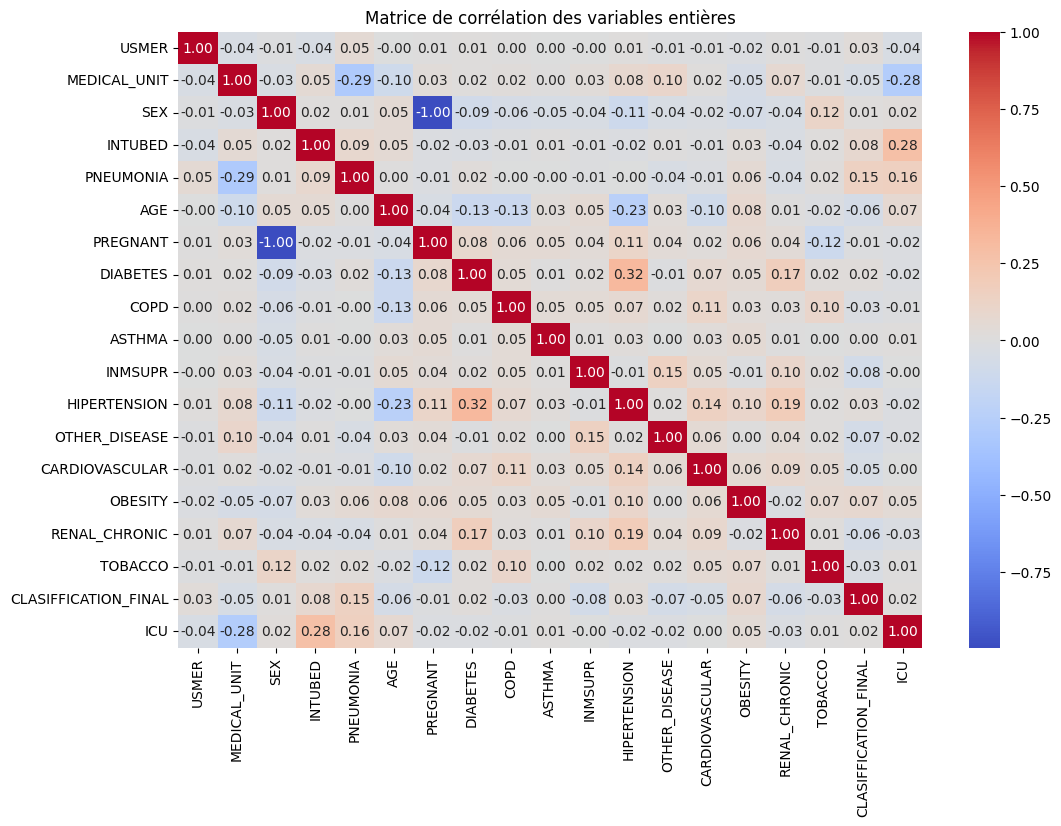

In [ ]:
# 1. Sélectionner les colonnes de type int
int_columns = covid.select_dtypes(include='int').columns

# 2. Calculer la matrice de corrélation pour ces colonnes
corr_matrix = covid[int_columns].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation des variables entières")
plt.show()

D'aprés ceci , suel deux variables sont en correlation negative ce qui veux dire quand SEX augmente, PREGNANT diminue c’est logique car d’après les données : 

Tous les hommes (SEX=1) => PREGNANT vaut 3 (non applicable)

Les femmes (SEX=2) =>  PREGNANT vaut 1 (enceinte) ou 2 (pas enceinte)

Par conséquent, conserver  ces deux variable dans une analyse corrélationnelle va introduire une colinéarité parfaite, ce qui peut poser problème dans des modèles de régression. Il est donc préférable de les éviter dans ce type d’analyse.